# Credit Card Clustering (PCA + Kmeans)

<img src= "https://www.bajajfinservmarkets.in/discover/wp-content/uploads/2022/01/Credit-Card-Default_Blog-banner-min.png"/>

- **Objective**

    Our main task is to cluster credit card users into different groups and see if we can find any meaningful patterns. We will use Principal Component Analysis (PCA) to reduce the dimension of the feature space and then use the K-means algorithm to find clusters.

- **Dataset**

    The dataset contains 30000 observations and 57 attributes for each observation. 

- **PCA**

    Use PCA to reduce the dimensionality of our data. Select an appropriate number of components and analyze total variance explained. 
- **Kmeans Clustering**

    Cluster using the Kmeans algorithm and find the optimum numebr of clusters. 

- **Interpretation & Conclusion**

    Visualize the clustered data, draw a decision boundary and try to interpret the clusters in context to the problem at hand.

## Importing Modules and Data

In [42]:
# data processing
import pandas as pd
import numpy as np

# Scipy
import scipy.stats as stats

# modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid');

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

In [43]:
# Importing Data from git
infile = 'https://raw.githubusercontent.com/vishal-git/dapt-631/main/data/credit_default_model_data.csv'
df = pd.read_csv(infile)

#Renameing Columns
df.columns = df.columns.str.replace(' ', "_")

df.head(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,pay_bucket_-2_flag,pay_bucket_-1_flag,pay_amt_total,bill_amt_total,pay_to_billed_ratio,zero_bill_amount,utilization_avg,utilization_max,group,default_payment_next_month
0,40000,28,10371,11895,11228,2475,5341,6255,2567,0,...,0,1,11883,47565,0.249827,0,0.198187,0.297375,M,1
1,320000,35,12233,16490,20011,17918,18627,19167,7000,4100,...,0,0,15100,104446,0.144572,0,0.054399,0.062534,M,0
2,260000,35,188,188,188,188,194,188,188,188,...,0,1,1167,1134,1.029101,0,0.000727,0.000746,M,0
3,360000,36,308711,305594,306176,304645,315118,315782,11000,13000,...,0,0,71322,1856026,0.038427,0,0.859271,0.877172,M,0
4,500000,25,-46,9412,1260,0,1121,6566,9458,1260,...,0,1,20839,18313,1.137935,0,0.006104,0.018824,M,0


## EDA

In [44]:
# Data Shape
print(df.shape)

(30000, 57)


### Checking for duplicates

In [45]:
# Checking for Duplicates
print(len(df[df.duplicated()]))
df[df.duplicated()]

13


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,pay_bucket_-2_flag,pay_bucket_-1_flag,pay_amt_total,bill_amt_total,pay_to_billed_ratio,zero_bill_amount,utilization_avg,utilization_max,group,default_payment_next_month
7653,160000,28,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,M,0
10769,200000,26,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,M,0
12320,10000,46,1050,1050,1050,1050,1050,1050,0,0,...,0,0,0,6300,0.0,0,0.1050,0.1050,M,1
12464,200000,36,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,M,0
13022,360000,29,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,M,0
13542,50000,26,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,M,0
13604,20000,26,1050,1050,1050,1050,1050,1050,0,0,...,0,0,0,6300,0.0,0,0.0525,0.0525,M,1
14233,50000,23,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,M,0
14822,20000,24,1650,1650,1650,1650,1650,1650,0,0,...,0,0,0,9900,0.0,0,0.0825,0.0825,M,1
22215,150000,31,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,1,0.0000,0.0000,T,0


In [46]:
# Dropping the duplicates
df.drop_duplicates()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,pay_bucket_-2_flag,pay_bucket_-1_flag,pay_amt_total,bill_amt_total,pay_to_billed_ratio,zero_bill_amount,utilization_avg,utilization_max,group,default_payment_next_month
0,40000,28,10371,11895,11228,2475,5341,6255,2567,0,...,0,1,11883,47565,0.249827,0,0.198187,0.297375,M,1
1,320000,35,12233,16490,20011,17918,18627,19167,7000,4100,...,0,0,15100,104446,0.144572,0,0.054399,0.062534,M,0
2,260000,35,188,188,188,188,194,188,188,188,...,0,1,1167,1134,1.029101,0,0.000727,0.000746,M,0
3,360000,36,308711,305594,306176,304645,315118,315782,11000,13000,...,0,0,71322,1856026,0.038427,0,0.859271,0.877172,M,0
4,500000,25,-46,9412,1260,0,1121,6566,9458,1260,...,0,1,20839,18313,1.137935,0,0.006104,0.018824,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,50000,34,49093,50375,51400,0,0,0,2400,2400,...,1,0,4800,150868,0.031816,0,0.502893,1.028000,V,1
29996,50000,54,49264,50310,50782,49335,50133,51071,2500,1900,...,0,0,10709,300895,0.035590,0,1.002983,1.021420,V,1
29997,290000,39,58281,62061,65710,69452,73627,77890,5000,5000,...,0,0,32000,407021,0.078620,0,0.233920,0.268586,V,0
29998,60000,46,56869,57976,54398,46937,19085,19506,2110,2131,...,0,0,9251,254771,0.036311,0,0.707697,0.966267,V,0


### Checking for Nulls

In [47]:
# Checking for null values in each column
print(df.isnull().sum().sum())

0


In [48]:
# Column Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
AGE,30000.0,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,7.900000e+01
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.000000,3558.750000,22381.500000,67091.000000,9.645110e+05
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.000000,2984.750000,21200.000000,64006.250000,9.839310e+05
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.000000,2666.250000,20088.500000,60164.750000,1.664089e+06
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.000000,2326.750000,19052.000000,54506.000000,8.915860e+05
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.000000,1763.000000,18104.500000,50190.500000,9.271710e+05
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.000000,1256.000000,17071.000000,49198.250000,9.616640e+05
PAY_AMT1,30000.0,5663.580500,16563.280354,0.000000,1000.000000,2100.000000,5006.000000,8.735520e+05
PAY_AMT2,30000.0,5921.163500,23040.870402,0.000000,833.000000,2009.000000,5000.000000,1.684259e+06


- **First Look**

    There are 29987 rows and 57 attributes in each row. Since this is an unsupervised learning problem, we do not need a response variable, therefore dropping the column 'default_payment_next_month'. Moreover, note that we will be doing K-means to make clusters so we do not need the column 'group'.

In [49]:
target = 'default_payment_next_month'

# Creating X and Y
y = df[target]
x = df.drop(target, axis=1)

# Discarding column 'group'
x = x.drop('group', axis=1)

In [50]:
# Taking Random sample for analysis
x_sample = x.sample(n=10000, random_state=314)
y_sample = y.sample(n=10000, random_state=314)
print(x_sample.shape)
print(y_sample.shape)

(10000, 55)
(10000,)


## Numerical Variables

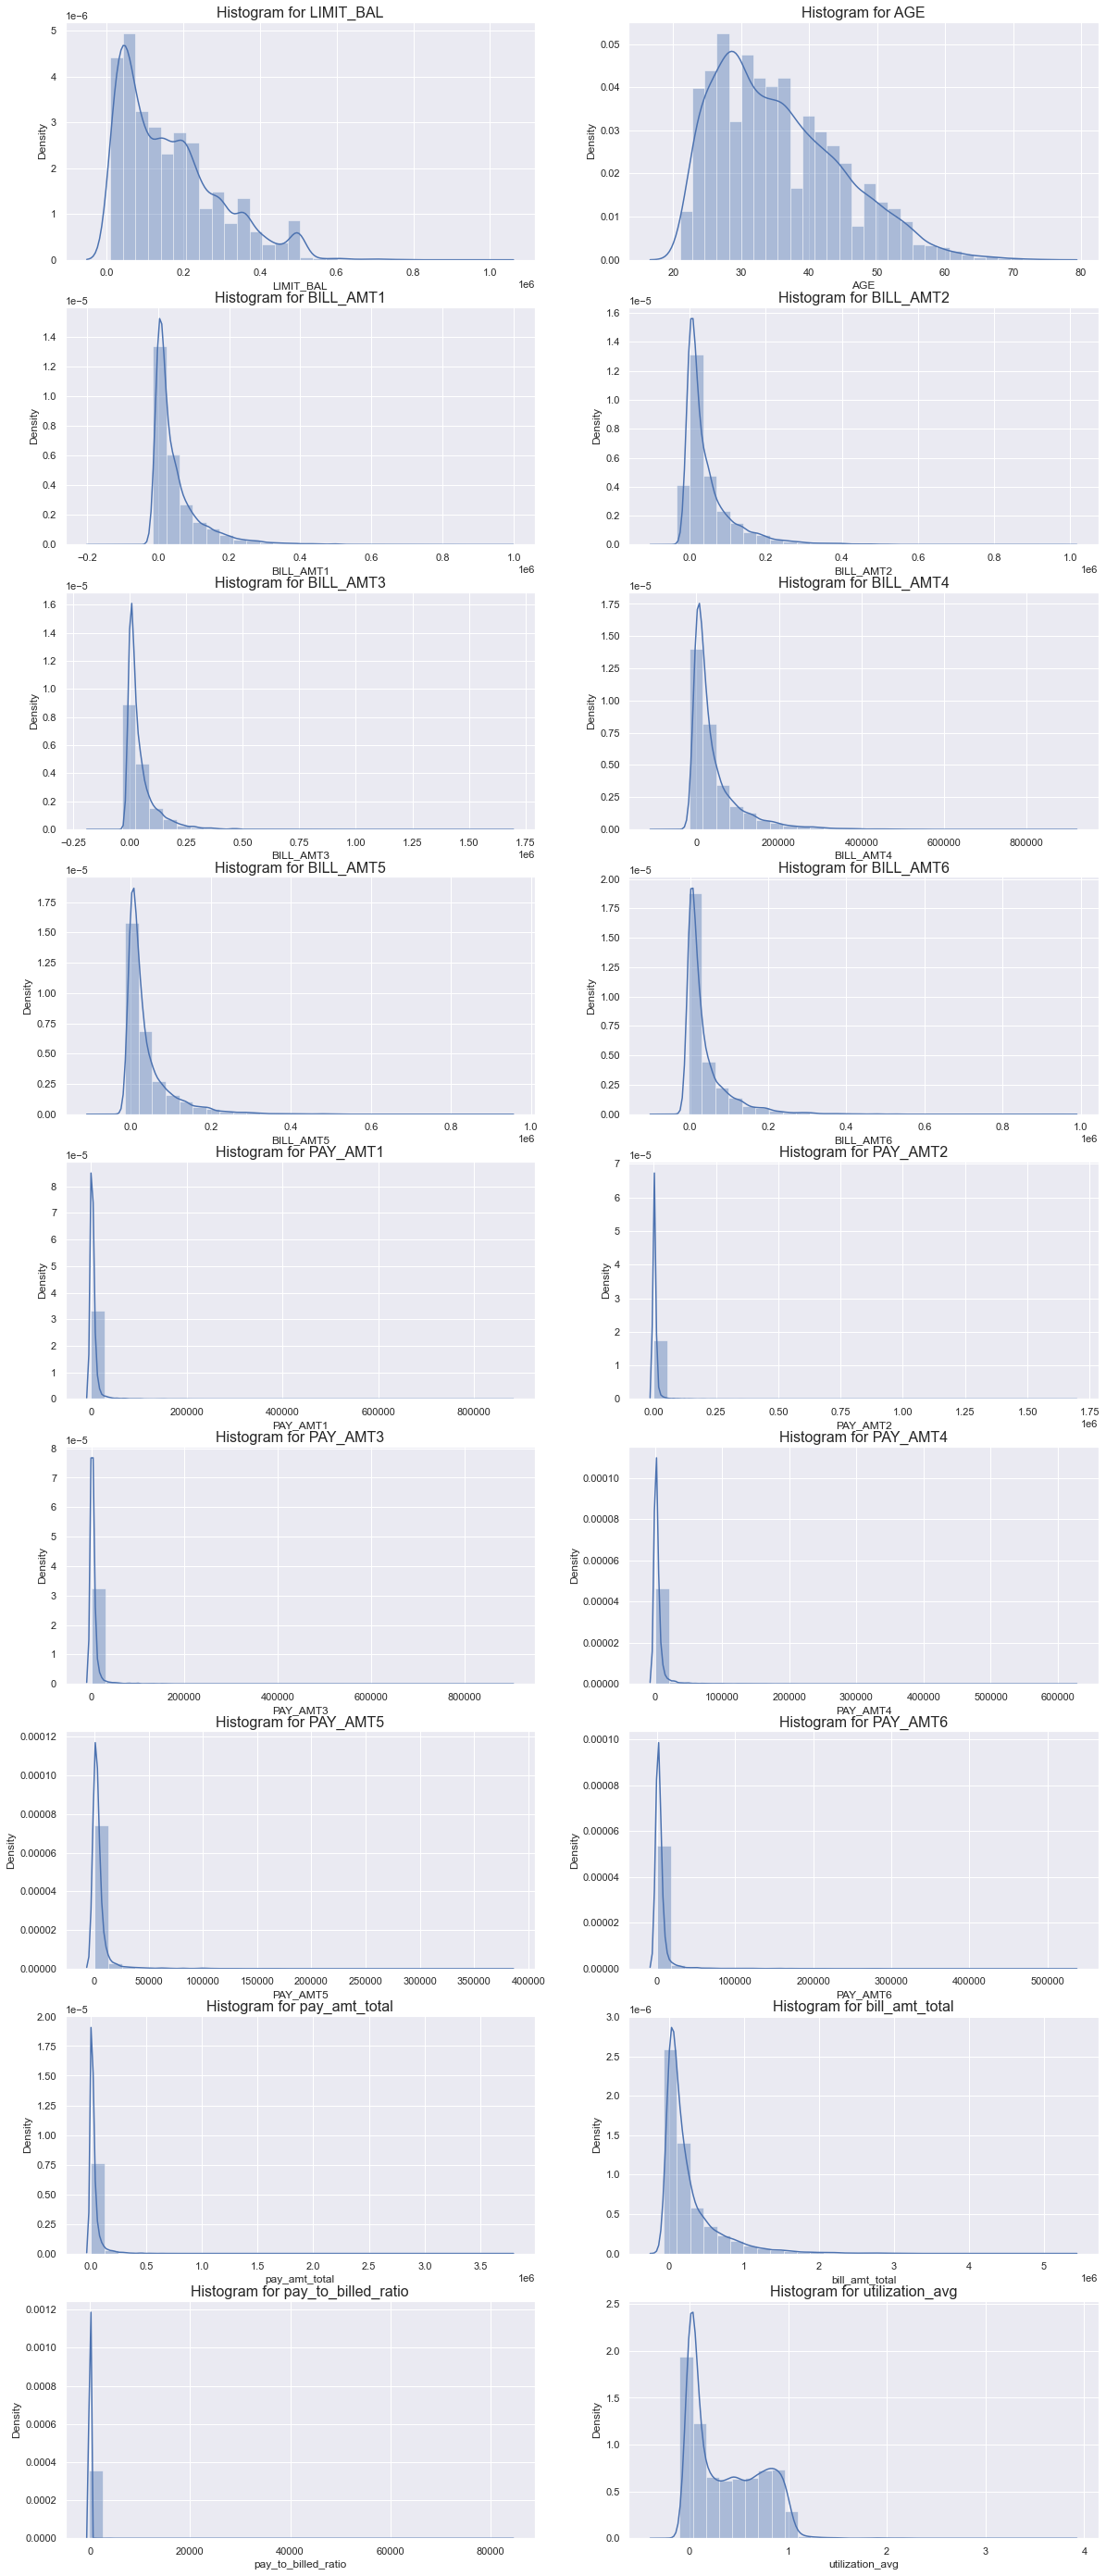

In [51]:
# Vizuzlizing the numerical Colums
ncols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','pay_amt_total','bill_amt_total',
'pay_to_billed_ratio','utilization_avg','utilization_max']

fig, axes= plt.subplots(nrows=9, ncols=2, figsize = (20,50))

for i, z in enumerate(axes.flat):
    column = ncols[i]
    #x_sample[column].hist(ax=z, grid=False, color='blue')
    sns.distplot(x_sample[column],kde=True,bins=30,ax=z)
    z.set_title(f"Histogram for {column}", size = 16, pad = 5)

### Correlation between Numerical Variables

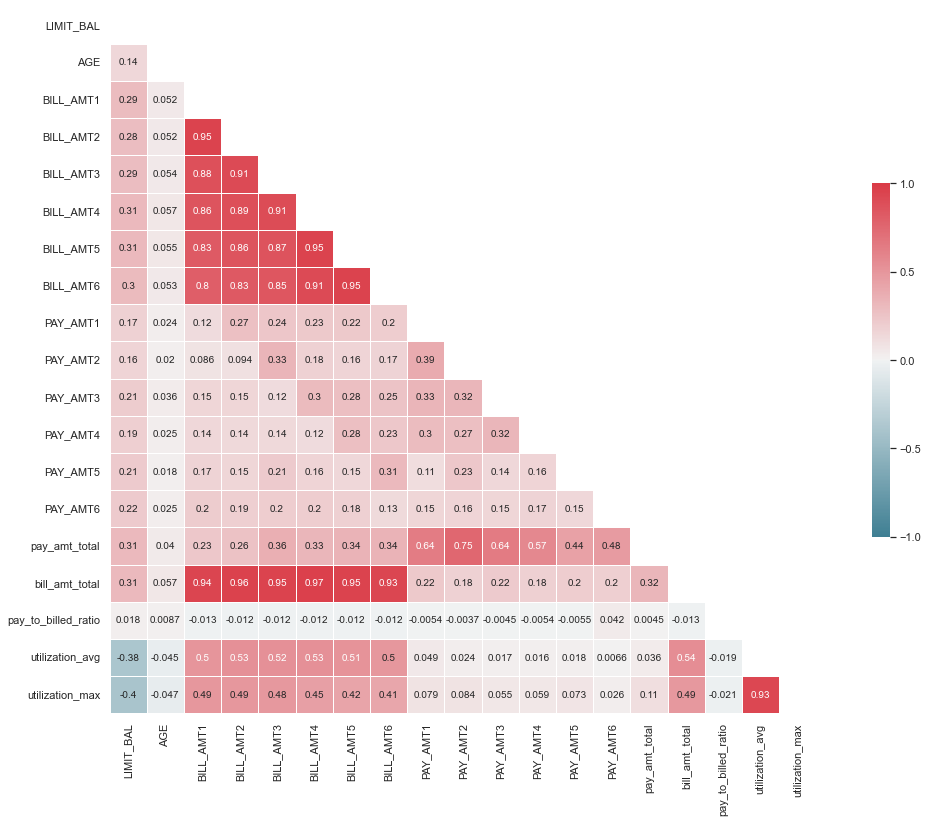

In [52]:
# Correlation matrix
sns.set(style="white", font_scale=1)
corr = x_sample[ncols].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.show()

## Standardizing The Numerical Columns

In [12]:
# Standardizing the numerical Columns
#x_scaled = x_sample.copy()
#for i in ncols:
    # x_scaled.loc[:,i] = stats.zscore(x_scaled.loc[:,i], ddof=0)    
# When you call zscore with ddof=0, you get the same output as the StandardScaler.

In [53]:
X_scaler = StandardScaler()

# fit and transform the sample data frame
x_scaled = X_scaler.fit_transform(x_sample)

# transform the entire data frame
X_all= X_scaler.fit_transform(x)

## Categorical Variables

In [ ]:
# Visualizing Numerical Columns
ccol = x_sample.columns[x_sample.dtypes =='object'].values
fig, axes= plt.subplots(nrows=7, ncols=5, figsize = (20,50))

for i, z in enumerate(axes.flat):
    column = ccol[i]
    x_sample[column].hist(ax=z, grid=False, color='orange')
    z.set_title(f"Histogram for {column}", size = 12, pad = 5)

# PCA

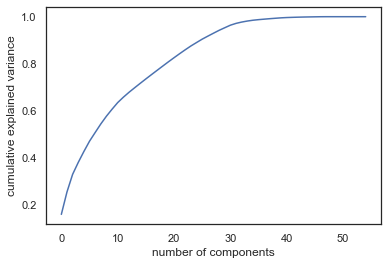

In [54]:
pca = PCA()
pca.fit(x_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
print("variation explained by PCA = 10 ", np.cumsum(pca.explained_variance_ratio_)[10])
print("variation explained by PCA = 20 ", np.cumsum(pca.explained_variance_ratio_)[20])
print("variation explained by PCA = 30 ", np.cumsum(pca.explained_variance_ratio_)[30])
print("variation explained by PCA = 40 ", np.cumsum(pca.explained_variance_ratio_)[40])
print("variation explained by PCA = 50 ", np.cumsum(pca.explained_variance_ratio_)[50])

variation explained by PCA = 10  0.6344842500157498
variation explained by PCA = 20  0.825541443472505
variation explained by PCA = 30  0.9639157181534217
variation explained by PCA = 40  0.9964111429944145
variation explained by PCA = 50  1.0000000000000002


PCA Interpretation:  

The above graph shows that Principal components above 30-40 can explain more than 96-99% of the variation in the dataset.

# PCA + K-Means

In [56]:
clusters = [3, 4, 5, 6, 7, 8, 9, 10]
components_to_keep = [10, 15, 20, 25, 30]
ss = pd.DataFrame(columns = ['PCA', 'Clusters', 'SilhoutteScore'] )
for cluster in clusters:
    for pca in components_to_keep:
        pca = PCA(n_components=pca, random_state=314)
        pca.fit(x_scaled)
        pca_score = pca.transform(x_scaled)

        kmeans_pca = KMeans(n_clusters=cluster, random_state=314)
        kmeans_pca.fit(pca_score)

        # Calculate Silhoutte Score
        score = silhouette_score(x_scaled, kmeans_pca.labels_,  metric='euclidean',sample_size=None)
        new_ss = {'PCA': pca.n_components_, 'Clusters': cluster, 'SilhoutteScore': score}
        ss = ss.append(new_ss,ignore_index = True)

In [58]:
# Best Silhoutte Score
max_ss = ss[ss['SilhoutteScore'] == max(ss['SilhoutteScore'])]
best_pca = int(max_ss['PCA'])
best_cluster = int(max_ss['Clusters'])
max_ss

,PCA,Clusters,SilhoutteScore
3,25.0,3.0,0.213956


After running multiple combination of PCA and clusters, based on the SilhoutteScore turns out that the best number of PCA and clusters which gives dense and well-separated the clusters are pca = 25 and clusters = 3.

## Runing the K-Means on entire dataset

In [59]:
pca_all = PCA(n_components=best_pca, random_state=314)
pca_all.fit(X_all)
pca_score_all = pca_all.transform(X_all)

kmeans_pca_all = KMeans(n_clusters=best_cluster, random_state=314)
kmeans_pca_all.fit(pca_score_all)

# Calculate Silhoutte Score
score_all = silhouette_score(X_all, kmeans_pca_all.labels_, metric='euclidean')
print(f'The Silhouette score for clustering the entire data set using PCA = {best_pca} and clusters = {best_cluster} is {round(score_all,2)}')

The Silhouette score for clustering the entire data set using PCA = 25 and clusters = 3 is 0.14


In [60]:
# Storing Clusters in the data frame:
df = df.copy()
df['Clusters'] = kmeans_pca_all.labels_
df['Clusters'].value_counts()

1    15180
2    11215
0     3605
Name: Clusters, dtype: int64

## Creating Index for Clusteravg per overall avg for Numerical Variables

In [61]:
ncols_c = ncols.copy()
ncols_c.append('default_payment_next_month')
ncols_c.append('Clusters')
tb = df[ncols_c[0:20]]
tb2 = df[ncols_c]
overall_avg = tb.mean()
grouped_df = tb2.groupby("Clusters")
mean_df = grouped_df.mean()
((mean_df/overall_avg)*100).T

Clusters,0,1,2
LIMIT_BAL,168.189742,60.524100,131.513164
AGE,104.257778,97.171386,102.460015
BILL_AMT1,388.896916,93.196606,16.344373
BILL_AMT2,399.548138,92.904965,13.315345
BILL_AMT3,407.828763,90.818740,13.477382
BILL_AMT4,414.880397,88.328454,14.581386
BILL_AMT5,415.566187,87.195589,15.894325
BILL_AMT6,412.760076,87.070450,16.965715
PAY_AMT1,295.183974,66.345288,82.812332
PAY_AMT2,305.021208,60.164681,88.015933


1. Does the age (AGE) vary significantly across clusters, or do customers across all clusters have similar 
age on average? 

        Ans: Cluster 1 has a lower avg age. While, Cluster 1 and 2 are have closer avg age

2. Which cluster has the highest credit limit (LIMIT_BAL) on average? For the cluster with the highest 
index for credit limit, what education level are they most likely to have? (EDU_0: Not available, EDU_1: 
Graduate school, EDU_2: University, EDU_3: High School) 

In [62]:
clust_0 = df[df['Clusters'] == 0]
edu_cols = ['EDU_0', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6']
clust_0[edu_cols].sum()

EDU_0       0
EDU_1    1439
EDU_2    1602
EDU_3     463
EDU_4      19
EDU_5      69
EDU_6      13
dtype: int64

        ANS: Cluster 0 has the highest Limit bal (credit limit).
        
        In Cluster 0 the people are going to have the EDU_1(Graduate) and EDU_2(University students) the most.


3. Which cluster(s) have higher than average default rate on average (default payment next month)? 

        ANS: Cluster 1 has the highest default rate.

# CLusters Interpretation

# ROugh Work

In [64]:
clust_0 = df[df['Clusters'] == 1]
edu_cols = ['EDU_0', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6']
clust_0[edu_cols].sum()

EDU_0       1
EDU_1    3559
EDU_2    8442
EDU_3    2992
EDU_4      32
EDU_5     132
EDU_6      22
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="LIMIT_BAL", y="AGE", hue="Clusters")
plt.show()

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_all.components_
num_pc = pca_all.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

In [ ]:
# get correlation matrix plot for loadings
plt.figure(figsize=(30, 20))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_score_all[:,0],pca_score_all[:,1], c=df['Clusters'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
# PCA Loading Plots
    pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_all.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_all.explained_variance_ratio_[1]*100, 2))

In [ ]:
# get 2D biplot
sklearn.cluster.biplot(cscore=pca_score, loadings=loadings, labels=df.columns.values, var1=round(pca_all.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_all.explained_variance_ratio_[1]*100, 2))

In [ ]:

    
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [ ]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_score_all, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
# get 3D biplot
cluster.biplot(cscore=pca_score_all, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [ ]:
for pca in components_to_keep:
    pca = PCA(n_components=components_to_keep, random_state=314)
    pca.fit(x_scaled)
    pca_data = pca.fit_transform(x_scaled)

In [ ]:
##Correlation analysis with similar names to check the correlation

# BILL_AMT
corr_df_Bill_amt = x_sample.iloc[:,2:7].corr(method= 'pearson')
hmap=sns.heatmap(corr_df_Bill_amt)
plt.show()

#PAY_AMT
corr_df_pay_amt = x_sample.iloc[:,8:13].corr(method= 'pearson')
hmap=sns.heatmap(corr_df_pay_amt)
plt.show()

# pay_bucket_1_count
corr_df_pay_bucket_count = x_sample.iloc[:,27:38].corr(method= 'pearson')
hmap=sns.heatmap(corr_df_pay_bucket_count)
plt.show()

# pay_bucket_flag
corr_df_pay_bucket_flag = x_sample.iloc[:,39:49].corr(method= 'pearson')
hmap=sns.heatmap(corr_df_pay_bucket_flag)
plt.show()

BIll_AMT* highly correlates with BILL_Total.

BILL_AMT* are interrelated.

PAY_AMT* highly correlates with pay_amt_total

## BoxPlot

In [ ]:
sns.boxplot(x_sample['pay_to_billed_ratio'])


In [ ]:
sns.boxplot(x['pay_to_billed_ratio'])

In [ ]:
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=x[ncols])
plt.xticks(np.arange(0,19), labels=ncols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim=(-1, 1)

In [ ]:
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=x_sample[ncols])
plt.xticks(np.arange(0,19), labels=ncols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim=(-1, 1)
# plt.title('Boxplot', fontsize= 35)

In [ ]:
x_sample['pay_to_billed_ratio'].value_counts

In [ ]:
# Outliers
x_sample.sort_values(by = 'pay_to_billed_ratio', ascending = False).head(5)


In [ ]:
#  Checking Data Distribution for SEX_1 Variable
unique, counts = np.unique(x_sample['SEX_1'], return_counts=True)
print( np.asarray((unique, counts)).T)

#  Checking Data Distribution for SEX_2 Variable
unique, counts = np.unique(x_sample['SEX_2'], return_counts=True)
print( np.asarray((unique, counts)).T)

In [ ]:
# Changing data types for categorical columns
df.iloc[:,14:48] = df.iloc[:,14:48].astype('object')
df.iloc[:,52] = df.iloc[:,52].astype('object')
df.iloc[:,55] = df.iloc[:,55].astype('object')
df.iloc[:,56] = df.iloc[:,56].astype('object')

In [ ]:
sns.distplot(x_sample.columns[2:7]['LIMIT_BAL'],kde=True,bins=30)

## Vizualizing Numerical variables

In [ ]:
# Visualizing Numerical Columns
ncol = x_sample.columns[x_sample.dtypes !='object'].values
fig, axes= plt.subplots(nrows=9, ncols=2, figsize = (20,50))

for i, z in enumerate(axes.flat):
    column = ncol[i]
    x_sample[column].hist(ax=z, grid=False, color='blue')
    z.set_title(f"Histogram for {column}", size = 16, pad = 5)
    

## Vizualizing the Categorical Columns

In [ ]:
# Visualizing Numerical Columns
ccol = x_sample.columns[x_sample.dtypes =='object'].values
fig, axes= plt.subplots(nrows=7, ncols=5, figsize = (20,50))

for i, z in enumerate(axes.flat):
    column = ccol[i]
    x_sample[column].hist(ax=z, grid=False, color='orange')
    z.set_title(f"Histogram for {column}", size = 12, pad = 5)

It can be seen, for few of the columns like "pay_buket_8_flag" , "pay_bucket_5_count" etc , the sample has only 0 values. The random slection did not included the values like 4,6,2 etc for these columns.

In [ ]:
# plot columns with similar names to check the correlation

sns.pairplot(x_sample, vars=x_sample.columns[2:7], kind='scatter')
sns.pairplot(x_sample, vars=x_sample.columns[8:13])
#sns.pairplot(x_sample, vars=x_sample.columns[16:22], kind='scatter',hue= 'def_pay')
#sns.pairplot(x_sample, vars=x_sample.columns[27:37], kind='scatter',hue= 'def_pay')